In [1]:
import sys
import os

# Add src to path
sys.path.append(os.path.abspath('../src'))

from simulation.engine import Simulation
from simulation.matrix_engine import MatrixSimulation
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Initialize Simulation
sim = Simulation(initial_ordinary=100, initial_bio=100)

# Run for 500 years
sim.run(500)

In [3]:
# Convert history to DataFrame
df = pd.DataFrame(sim.history)
df.tail()

,year,ordinary,bio,total
495,496,0,0,0
496,497,0,0,0
497,498,0,0,0
498,499,0,0,0
499,500,0,0,0


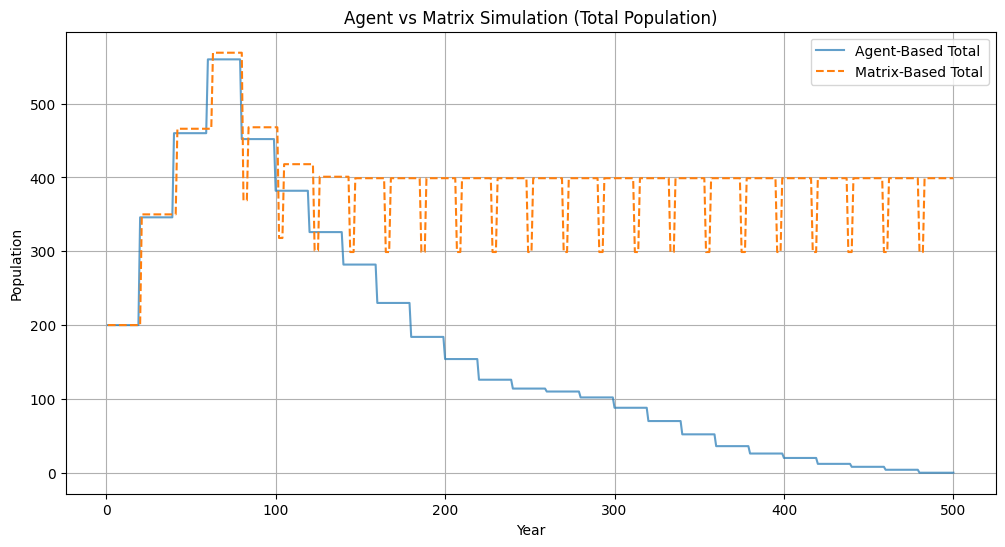

In [4]:
# Run Matrix Simulation
matrix_sim = MatrixSimulation(initial_ordinary=100, initial_bio=100)
matrix_sim.run(500)
df_matrix = pd.DataFrame(matrix_sim.history)

# Plot Comparison
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['total'], label='Agent-Based Total', alpha=0.7)
plt.plot(df_matrix['year'], df_matrix['total'], label='Matrix-Based Total', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Agent vs Matrix Simulation (Total Population)')
plt.legend()
plt.grid(True)
plt.show()

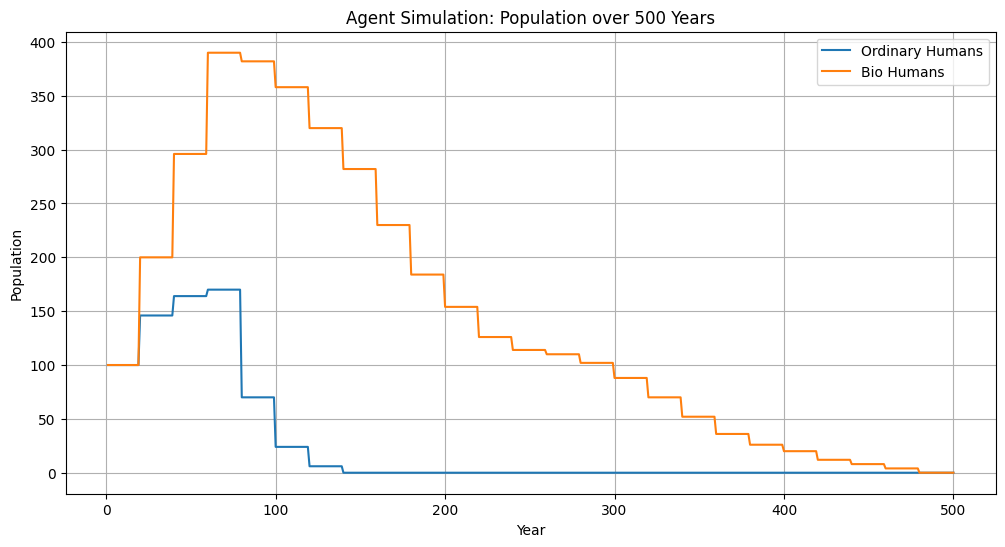

In [5]:
# Plotting Agent Results
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['ordinary'], label='Ordinary Humans')
plt.plot(df['year'], df['bio'], label='Bio Humans')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Agent Simulation: Population over 500 Years')
plt.legend()
plt.grid(True)
plt.show()

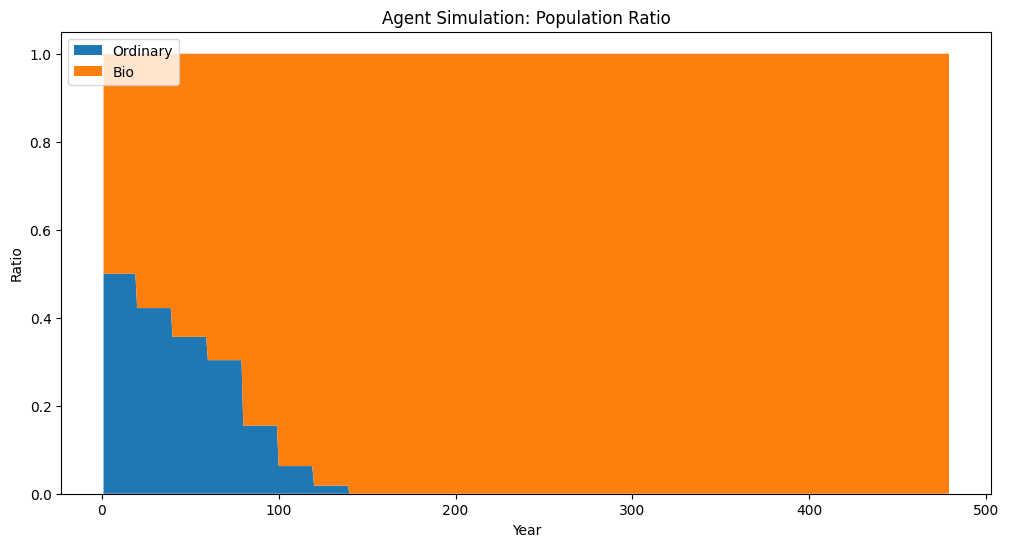

In [6]:
# Calculate Ratios (Agent)
df['total'] = df['ordinary'] + df['bio']
df['ord_ratio'] = df['ordinary'] / df['total']
df['bio_ratio'] = df['bio'] / df['total']

plt.figure(figsize=(12, 6))
plt.stackplot(df['year'], df['ord_ratio'], df['bio_ratio'], labels=['Ordinary', 'Bio'])
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Agent Simulation: Population Ratio')
plt.legend(loc='upper left')
plt.show()